# 2.1 Color quantization k-means

For this problem you will write code to quantize a color space by applying k-means clustering to the pixels in a given input image. We will experiment with two different color spaces — RGB and HSV.

Implement each of the functions described below. After each function there is a test on the 4x6 image that will be generated within this notebook. These test are to help you verify and debug your code. However, they will not cover every possible edge case. We encourage you to write additional test or debug your code line-by-line to make sure the functions work as expected.

> Note: to pass the tests in this notebook and on Gradescope you will need to use a random seed value of `101` whenever possible. Please check the docstrings for any of the 3rd party functions to make sure you set the random seed properly.

### Exporting this notebook to a .py script

Once you are done implementing all the required functions in this notebook, you can go ahead and use the provided `notebook2script.py` script to convert this notebook into a `.py` file for submission.

The provided script will look for all the cells with the `#export` tag in the first line of the cell and only add those cells to the final script. This tag is already present for all the required cells in this notebook.

If you add any cells that you want to include in the submission, you can add the tag to the top of the cell.

The idea behind this is that students get to experiment, print and plot freely in the notebook while ensuring the submission file remains Gradescope friendly. Please avoid putting the `#export` tag on cells with `print`, `imshow`, and `plot` statements.

In [31]:
#export
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2hsv, hsv2rgb
from typing import Tuple

In [32]:
import matplotlib.pyplot as plt

The commands in the follwing cell will plot all images/plots in an interactive window. If you would prefer to not have interactive plots, comment out %matplotlib notebook and uncomment %matplotlib inline instead.

You can use plt.rcParams['figure.figsize'] to make all the plots in this notebook bigger or smaller.

In [33]:
%matplotlib notebook
# %matplotlib inline

# plt.rcParams['figure.figsize'] = (7, 3)

In [34]:
# set test_k = 4 to pass the tests in this notebook
test_k = 4

<IPython.core.display.Javascript object>


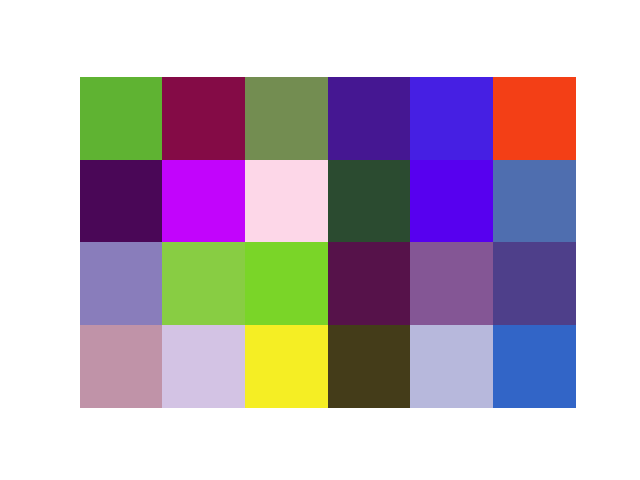

In [35]:
# generate a random test image (with a seed of `101`)
np.random.seed(101)
test_img = np.random.randint(0, 256, size=(4, 6, 3), dtype=np.uint8)

_, ax = plt.subplots()
ax.axis("off")
ax.imshow(test_img)

## (a) Quantize in RGB space

Given an RGB image, quantize the 3-dimensional RGB space, and map each pixel in the input image to its nearest k-means center. That is, replace the RGB value at each pixel with its nearest cluster’s average RGB value.

Use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to perfom the k-means clustering. See the documentation for details on how to use the class, and make sure you set `random_state=101`.

In [36]:
#export
def quantize_rgb(img: np.ndarray, k: int) -> np.ndarray:
    """
    Compute the k-means clusters for the input image in RGB space, and return
    an image where each pixel is replaced by the nearest cluster's average RGB
    value.

    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        k: The number of clusters to use

    Output:
        An RGB image with shape H x W x 3 and dtype "uint8"
    """
    quantized_img = np.zeros_like(img)
    
    ##########################################################################
    # TODO: Perfom k-means clustering and return an image where each pixel   #
    # is assigned the value of the nearest clusters RGB values.              #
    ##########################################################################
    
    samples = img.reshape((-1, img.shape[2]))
    print("sample size is",np.shape(samples))
    kMeans = KMeans(n_clusters=k, random_state=101)
    labels = kMeans.fit_predict(samples)
    centers = kMeans.cluster_centers_
    quantized_img = centers[labels].reshape(img.shape).astype(np.uint8)

    ##########################################################################
    ##########################################################################
    
    return quantized_img

In [37]:
expected_quantized_img_rgb = np.array([[[159, 173,  49],
        [ 80,  34,  60],
        [159, 173,  49],
        [ 99,  60, 190],
        [ 99,  60, 190],
        [159, 173,  49]],

       [[ 80,  34,  60],
        [ 99,  60, 190],
        [209, 185, 212],
        [ 80,  34,  60],
        [ 99,  60, 190],
        [ 99,  60, 190]],

       [[ 99,  60, 190],
        [159, 173,  49],
        [159, 173,  49],
        [ 80,  34,  60],
        [ 99,  60, 190],
        [ 99,  60, 190]],

       [[209, 185, 212],
        [209, 185, 212],
        [159, 173,  49],
        [ 80,  34,  60],
        [209, 185, 212],
        [ 99,  60, 190]]], dtype=np.uint8)

quantized_img_rgb = quantize_rgb(test_img, test_k)

if np.allclose(quantized_img_rgb, expected_quantized_img_rgb):
    print("\nQuantized image computed correctly!")
else:
    print("\nQuantized image is incorrect.")
    print(f"\nexpected:\n\n{expected_quantized_img_rgb}")
    print(f"\ncomputed:\n\n{quantized_img_rgb}")

sample size is (24, 3)

Quantized image computed correctly!


Let's take a look at the results.

<IPython.core.display.Javascript object>


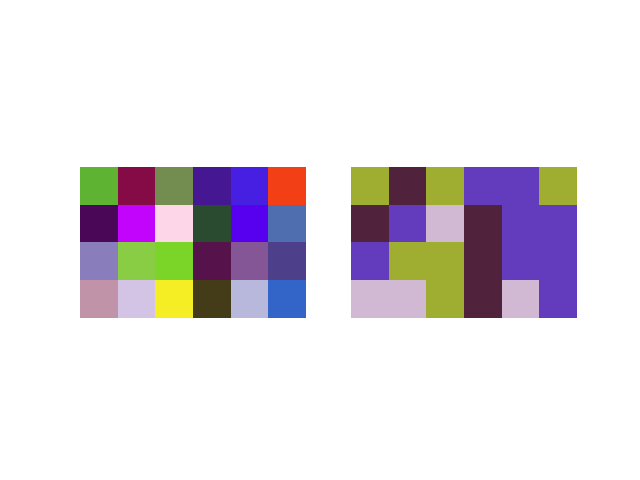

In [38]:
fig, axs = plt.subplots(1, 2)

axs[0].axis("off")
axs[0].imshow(test_img)

axs[1].axis("off")
axs[1].imshow(quantized_img_rgb)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-quantized-rgb-{k}.png", dpi=200, bbox_inches="tight")

## (b) Quantize in HSV space

Given an RGB image, convert it to HSV and quantize the 1-dimensional Hue space. Map each pixel in the input image to its nearest quantized Hue value, while keeping its Saturation and Value channels the same as the input. Convert the quantized output back to RGB color space.

Use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to perfom the k-means clustering. See the documentation for details on how to use the class, and make sure you set `random_state=101`.

Use the [skimage.color.rgb2hsv](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv) and [skimage.color.hsv2rgb](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.hsv2rgb) functions to convert the image to HSV and back to RGB.

In [39]:
#export
def quantize_hsv(img: np.ndarray, k: int) -> np.ndarray:
    """
    Compute the k-means clusters for the input image in the hue dimension of the
    HSV space. Replace the hue values with the nearest cluster's hue value. Finally,
    convert the image back to RGB.
    
    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        k: The number of clusters to use

    Output:
        An RGB image with shape H x W x 3 and dtype "uint8"
    """
    quantized_img = np.zeros_like(img)

    ##########################################################################
    # TODO: Convert the image to HSV. Perfom k-means clustering in hue       #
    # space. Replace the hue values in the image with the cluster centers.   #
    # Convert the image back to RGB.                                         #
    ##########################################################################
    
    hsv_img = rgb2hsv(img)
    hsv_hue = hsv_img[:,:,0]
    samples = hsv_hue.reshape((-1, 1))
    kMeans = KMeans(n_clusters=k, random_state=101)
    labels = kMeans.fit_predict(samples)
    centers = kMeans.cluster_centers_
    hsv_img[:,:,0] = centers[labels].reshape(hsv_hue.shape)
    quantized_img = (hsv2rgb(hsv_img) * 255).astype(np.uint8)
    
    ##########################################################################
    ##########################################################################

    return quantized_img

In [40]:
expected_quantized_img_hsv = np.array([[[ 94, 179,  49],
        [131,  11, 112],
        [101, 141,  81],
        [ 38,  23, 146],
        [ 55,  31, 227],
        [243, 166,  22]],

       [[ 87,   7,  74],
        [252,   3, 212],
        [253, 215, 246],
        [ 54,  75,  43],
        [ 29,   0, 239],
        [ 90,  79, 175]],

       [[132, 125, 187],
        [114, 205,  66],
        [ 99, 213,  40],
        [ 86,  17,  75],
        [149,  86, 139],
        [ 72,  63, 138]],

       [[192, 147, 184],
        [199, 195, 227],
        [245, 172,  36],
        [ 68,  53,  24],
        [187, 183, 220],
        [ 68,  49, 199]]], dtype=np.uint8)

quantized_img_hsv = quantize_hsv(test_img, test_k)

if np.allclose(quantized_img_hsv, expected_quantized_img_hsv):
    print("\nQuantized image computed correctly!")
else:
    print("\nQuantized image is incorrect.")
    print(f"\nexpected:\n\n{expected_quantized_img_hsv}")
    print(f"\ncomputed:\n\n{quantized_img_hsv}")


Quantized image computed correctly!


Let's take a look at the results.

<IPython.core.display.Javascript object>


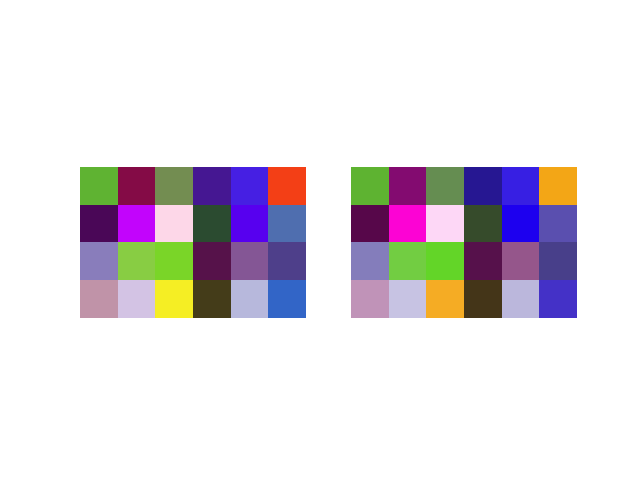

In [41]:
fig, axs = plt.subplots(1, 2)

axs[0].axis("off")
axs[0].imshow(test_img)

axs[1].axis("off")
axs[1].imshow(quantized_img_hsv)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-quantized-hsv-{k}.png", dpi=200, bbox_inches="tight")

## (c) Sum of squared error

Write a function to compute the SSD error (sum of squared error) between the original RGB pixel values and the quantized values

In [42]:
#export
def compute_quantization_error(img: np.ndarray, quantized_img: np.ndarray) -> int:
    """
    Compute the sum of squared error between the two input images.

    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        quantized_img: Quantized RGB image with shape H x W x 3 and dtype "uint8"

    Output:
    
    """
    error = 0

    ##########################################################################
    # TODO: Compute the sum of squared error.                                #
    ##########################################################################

    error = np.sum((quantized_img.astype(int) - img.astype(int))**2)

    ##########################################################################
    ##########################################################################

    return error

In [43]:
error_rgb = compute_quantization_error(test_img, quantized_img_rgb)
print(f"quantization error (rgb): {error_rgb:,}")

error_hsv = compute_quantization_error(test_img, quantized_img_hsv)
print(f"quantization error (hsv): {error_hsv:,}")

quantization error (rgb): 112,251
quantization error (hsv): 33,167


In [44]:
if error_rgb == 112251:
    print("\nQuantization error computed correctly!")
else:
    print("\nQuantization error incorrect")
    print(f"\nexpected: 112,251\ncomputed: {error_rgb}")


if error_hsv == 33167:
    print("\nQuantization error computed correctly!")
else:
    print("\nQuantization error incorrect")
    print(f"\nexpected: 33,167\ncomputed: {error_hsv}")


Quantization error computed correctly!

Quantization error computed correctly!


## (d) Calculate Hue histograms

Given an image, compute and display two histograms of its hue values. Let the first histogram use equally-spaced bins (uniformly dividing up the hue values), and let the second histogram use bins defined by the `k` cluster center memberships (i.e., all pixels belonging to hue cluster `i` go to the `i-th` bin, for `i=1,...k`).

In [45]:
#export
def get_hue_histograms(img: np.ndarray, k: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute the histogram values two ways: equally spaced and clustered.
    
    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        k: The number of clusters to use

    Output:
        hist_equal: The values for an equally spaced histogram
        hist_clustered: The values for a histogram of the cluster assignments
    """
    hist_equal = np.zeros((k,), dtype=np.int64)
    hist_clustered = np.zeros((k,), dtype=np.int64)

    ##########################################################################
    # TODO: Convert the image to HSV. Calculate a k-bin histogram for the    #
    # hue dimension. Calculate the k-means clustering of the hue space.      #
    # Calculate the histogram values for the cluster assignments.            #
    ##########################################################################

    hsv_img = rgb2hsv(img)
    hsv_hue = hsv_img[:, :, 0]
    hist_equal, _ = np.histogram(hsv_hue, bins=k)
    
    samples = hsv_hue.reshape((-1, 1))
    kMeans = KMeans(n_clusters=k, random_state=101)
    labels = kMeans.fit_predict(samples)
    hist_clustered, _ = np.histogram(labels, bins=k)

    ##########################################################################
    ##########################################################################
    
    return hist_equal, hist_clustered

In [46]:
expected_hist_equal = np.array([ 6,  2,  6, 10], dtype=np.int64)
expected_hist_clustered = np.array([3, 9, 7, 5], dtype=np.int64)

hist_equal, hist_clustered = get_hue_histograms(test_img, test_k)

if np.all(hist_equal == expected_hist_equal):
    print("\nEqual histogram values computed correctly!")
else:
    print("\nEqual histogram values are incorrect.")
    print(f"\nexpected: {expected_hist_equal}")
    print(f"\ncomputed: {hist_equal}")
    
if np.all(hist_clustered == expected_hist_clustered):
    print("\nClustered histogram values computed correctly!")
else:
    print("\nClustered histogram values are incorrect.")
    print(f"\nexpected: {expected_hist_clustered}")
    print(f"\ncomputed: {hist_clustered}")


Equal histogram values computed correctly!

Clustered histogram values are incorrect.

expected: [3 9 7 5]

computed: [3 7 9 5]


Let's take a look at the results.

<IPython.core.display.Javascript object>


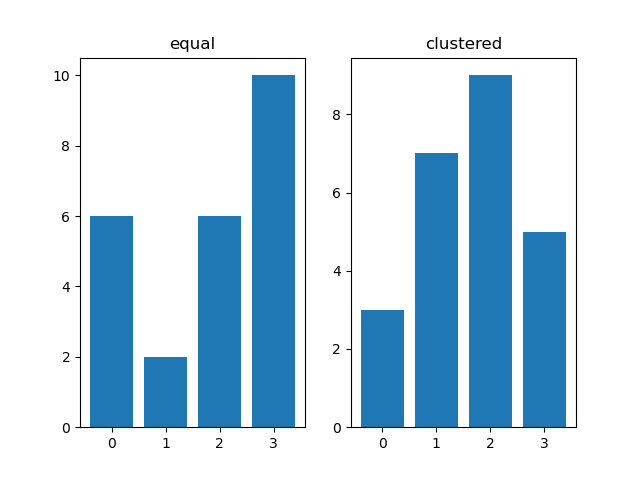

<BarContainer object of 4 artists>

In [47]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("equal")
axs[0].bar(np.arange(test_k), hist_equal)

axs[1].set_title("clustered")
axs[1].bar(np.arange(test_k), hist_clustered)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-histograms-{k}.png", dpi=200, bbox_inches="tight")

## Submission

Once you are ready to submit, you can run the following cell to export this notebook into a Python script. You should submit this script to Gradescope.

In [18]:
!python notebook2script.py

Converted KMeans.ipynb to submissionKMeans.py


In [60]:
from imageio import imread

fish = np.array(imread('./fish.jpg'))
K = 10

sample size is (163000, 3)


<IPython.core.display.Javascript object>


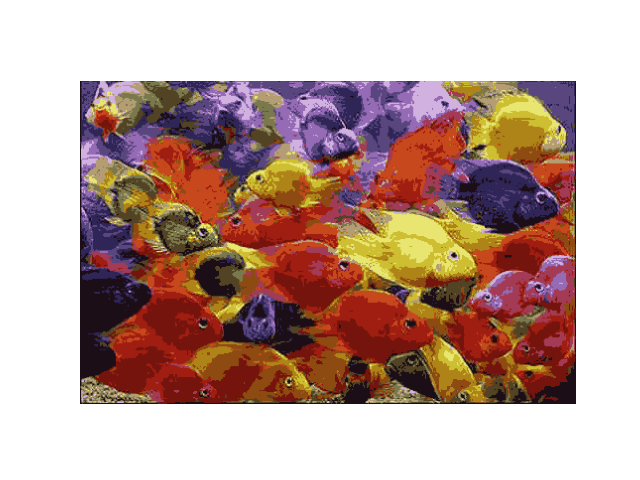

In [54]:
fish_rgb_quantized = quantize_rgb(fish, k=K)
_, ax = plt.subplots()
ax.axis("off")
ax.imshow(fish_rgb_quantized)
plt.imsave('2.1_1a_rgb_16.jpg',fish_rgb_quantized )

<IPython.core.display.Javascript object>


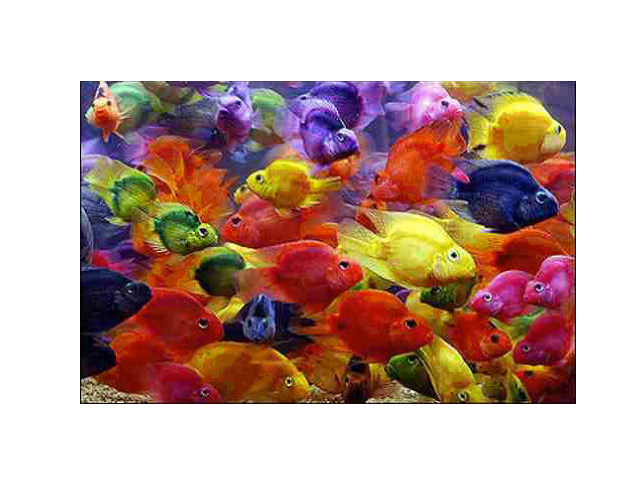

In [55]:
fish_hsv_quantized = quantize_hsv(fish, k=K)
_, ax = plt.subplots()
ax.axis("off")
ax.imshow(fish_hsv_quantized)
plt.imsave('2.1_1a_hsv_16.jpg',fish_hsv_quantized )

In [56]:
print('RGB-Quantization SSD Error, K={}:'.format(K), compute_quantization_error(fish, fish_rgb_quantized))
print('HSV-Quantization SSD Error, K={}:'.format(K), compute_quantization_error(fish, fish_hsv_quantized))

RGB-Quantization SSD Error, K=16: 183615979
HSV-Quantization SSD Error, K=16: 9614085


<IPython.core.display.Javascript object>


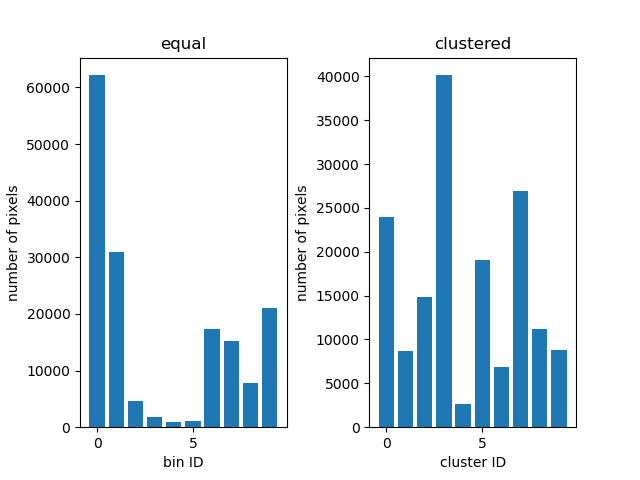

<BarContainer object of 10 artists>

In [61]:
hist_equal, hist_clustered = get_hue_histograms(fish, K)


fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.4)
axs[0].set_title("equal")
axs[0].set_xlabel("bin ID")
axs[0].set_ylabel("number of pixels")
axs[0].bar(np.arange(K), hist_equal)

axs[1].set_title("clustered")
axs[1].set_xlabel("cluster ID")
axs[1].set_ylabel("number of pixels")
axs[1].bar(np.arange(K), hist_clustered)

How do the two forms of histogram differ?

The two forms of histograms differ in terms of the sizes/ranges of bins. Both histograms display results of the hue space, but $\textbf{hist_equal}$ divides the hue space into $k$ equally-sized bins, whereas the $\textbf{hist_clustered}$ creates bins based on the clustereing results with $k$ clusters. The later has bins of that are not necessarily equally spaced, meaning some bins may have ranges larger than other bins.

How and why do results vary depending on the color space?

The results on images differ because the functions `quantize_rgb` and `quantize_hsv` opperate differently. `quantize_rgb` quantizes the images to have only $k$ RGB colors. On the contrary, `quantize_hsv` only quantizes the hue channel into $k$ values but leaves the brightness and saturation unaffected, resulting in more possible RGB values when converted to RGB images. In other words, for `quantize_rgb`, k corresponds to the number of colors, but for `quantize_hsv`, k only corresponds to number of hues.

The value of k?

As we increase the value of k, the SSD between the original image and the quantized ones dropped for both `quantize_rgb` and `quantized_hsv`. This is expected because adding more cluster centers would result in some data points become closer to one of the cluster centers. In the original image, the effect would be having pixels values more similar to that of the original image, thus lowering SSD.

Increasing the value of k would also make both images to look more similar to the original input image since we are allowed to have more representative colors. Meanwhile, the histograms also tend display more details: we can now observe some ranges of hues are much more frequent in the image than some others, because the distributions becomre more uneven.

Across different runs?

The results are consitent each time with a fixed random seed, and changing the value of k does not affect the trends we have observed. In particular, we can see the SSD for `quantize_hsv` is almost always lower than `quantize_rgb` because the former generally allows more RGB values than the latter.